In [1]:
import pygmo
import numpy as np
from PIL import Image

# Функции для оптимизации

In [2]:
class Optimization:

    def __init__(self,
                 Func: str,
                 x_min: float,
                 x_max: float,
                 y_min: float,
                 y_max: float,
                 img_pate = None):

        # Задайте входные аргументы как атрибуты, представляющие границы проблемы для обеих проектных переменных.
        self.Func = Func
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
        if img_pate:
            self.img = np.asarray(Image.open(img_pate).convert('L'))
            self.x_min = 0
            self.x_max = self.img.shape[0]
            self.y_min = 0
            self.y_max = self.img.shape[1]

    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])

    def fitness(self, x):
        if self.Func == "x^2":
            function_value = x[0]**2 + x[1]**2
        elif self.Func == "Розенброк":
            function_value = ((1 - x[0]) ** 2 + 100 * (x[1] - x[0] * x[0]) ** 2 )
        elif self.Func == "Бил":
            function_value = (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2
        elif self.Func == "Картинка":
            function_value = self.img[int(x[0])][int(x[1])]
        return [function_value]

In [3]:
Rozenbrok = Optimization("Розенброк",-100.0, 100.0, -100.0, 100.0)
Bil = Optimization("Бил",-4.5, 4.5, -4.5, 4.5)
image = Optimization("Картинка",0, 0, 0, 0,'картинка.png')

 ## Поиск минимума функции методом дифференциальной эволюции (DE)

In [4]:
def de(problem,minn):
    prob = pygmo.problem(problem)
    # Создать алгоритм решения
    number_of_generations = 1
    current_seed = 171015
    de_algo = pygmo.de(gen=number_of_generations, seed=current_seed)
    algo = pygmo.algorithm(de_algo)
    # Создать популяцию
    pop_size = 1000
    pop = pygmo.population(prob, size=pop_size, seed=current_seed)
    # Запустить эволюцию
    number_of_evolutions = 100
    for i in range(number_of_evolutions):
        pop = algo.evolve(pop)
    print('\n########### ПИЧАТЬ ЛУЧШЕГО РЕЗУЛЬТАТА ###########\n')
    print('Значение пригодности (= функция): ', pop.champion_f)
    print('Вектор переменной решения: ', pop.champion_x)
    print('Количество оценок функций: ', pop.problem.get_fevals())
    print('Разница относительно минимума: ', pop.champion_x - minn)

### Функция Розенброка

$$((1 - x) ^ 2 + 100 * (y - x * x) ^ 2 )$$

In [5]:
de(Rozenbrok,[1,1])


########### ПИЧАТЬ ЛУЧШЕГО РЕЗУЛЬТАТА ###########

Значение пригодности (= функция):  [8.05379656e-07]
Вектор переменной решения:  [0.99932064 0.9985831 ]
Количество оценок функций:  101000
Разница относительно минимума:  [-0.00067936 -0.0014169 ]


### Функция Била 

$$(1.5 - x + x*y)^2 + (2.25 - x + x*y^2)^2 + (2.625 - x + x*y^3)^2$$

In [6]:
de(Bil,[3,0.5])


########### ПИЧАТЬ ЛУЧШЕГО РЕЗУЛЬТАТА ###########

Значение пригодности (= функция):  [4.31440602e-16]
Вектор переменной решения:  [3.00000005 0.50000001]
Количество оценок функций:  101000
Разница относительно минимума:  [4.50917019e-08 9.03745190e-09]


 ## Поиск минимума функции методом муравьинных калоний

In [7]:
def gaco(problem,minn):
    prob = pygmo.problem(problem)
    # Создать алгоритм решения
    number_of_generations = 1
    current_seed = 171015
    de_algo = pygmo.gaco(gen=number_of_generations, seed=current_seed)
    algo = pygmo.algorithm(de_algo)
    # Создать популяцию
    pop_size = 1000
    pop = pygmo.population(prob, size=pop_size, seed=current_seed)
    # Запустить эволюцию
    number_of_evolutions = 100
    for i in range(number_of_evolutions):
        pop = algo.evolve(pop)
    print('\n########### ПИЧАТЬ ЛУЧШЕГО РЕЗУЛЬТАТА ###########\n')
    print('Значение пригодности (= функция): ', pop.champion_f)
    print('Вектор переменной решения: ', pop.champion_x)
    print('Количество оценок функций: ', pop.problem.get_fevals())
    print('Разница относительно минимума: ', pop.champion_x - minn)

In [8]:
gaco(Rozenbrok,[1,1])


########### ПИЧАТЬ ЛУЧШЕГО РЕЗУЛЬТАТА ###########

Значение пригодности (= функция):  [0.00240048]
Вектор переменной решения:  [1.02830855 1.0534196 ]
Количество оценок функций:  101000
Разница относительно минимума:  [0.02830855 0.0534196 ]


In [9]:
gaco(Bil,[3,0.5])


########### ПИЧАТЬ ЛУЧШЕГО РЕЗУЛЬТАТА ###########

Значение пригодности (= функция):  [1.04040153e-25]
Вектор переменной решения:  [3.  0.5]
Количество оценок функций:  101000
Разница относительно минимума:  [-7.91811061e-13 -2.09054996e-13]


## Поиск минимального пикселя на картинке

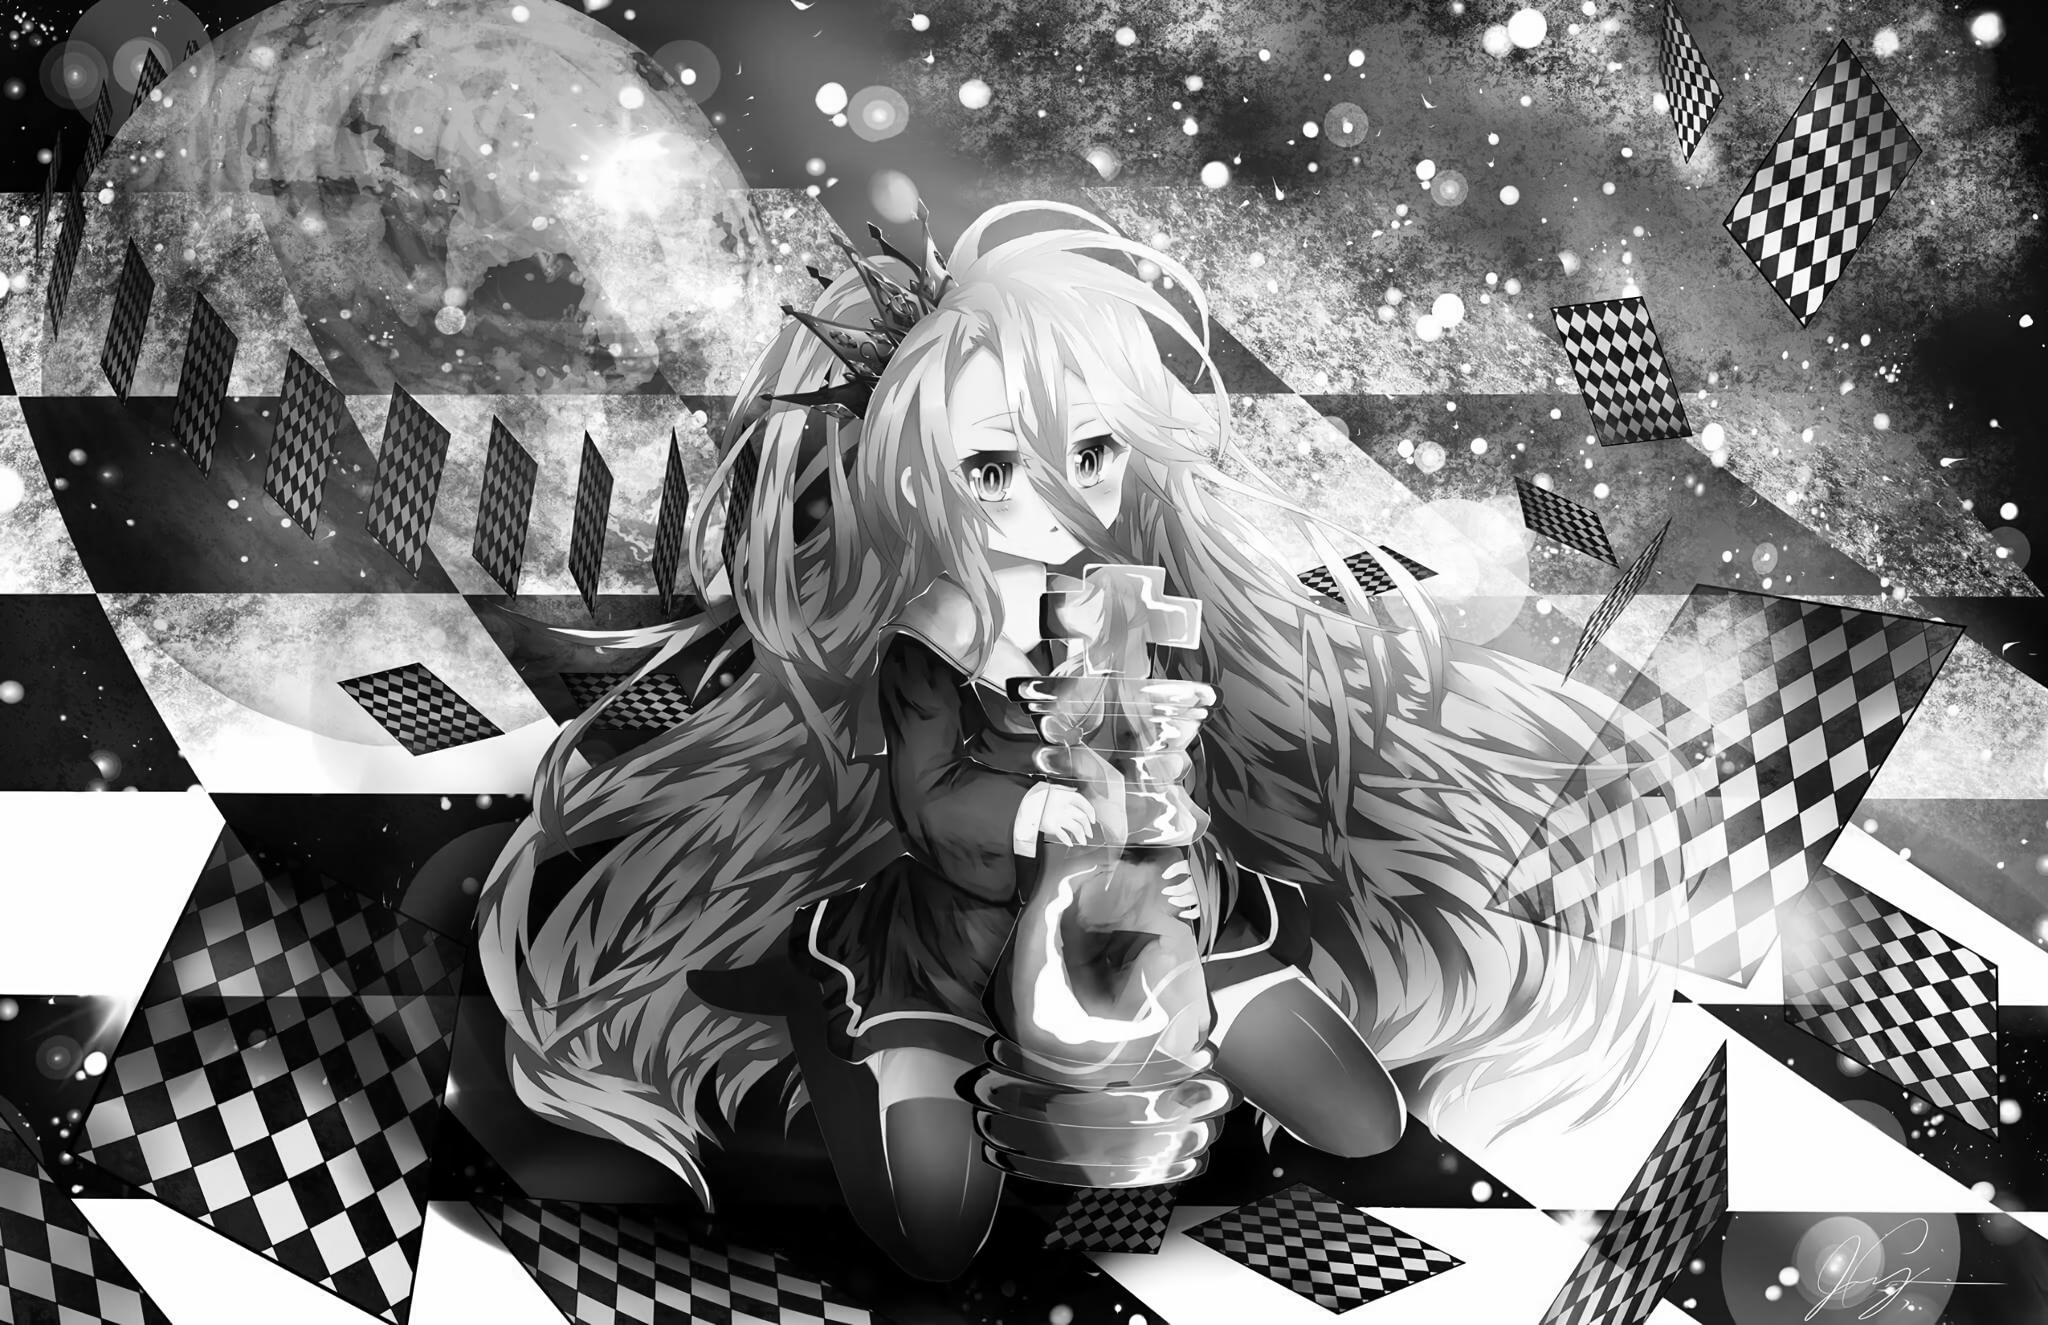

Размер:  1325 на 2048
Колличество решений: 16919


In [10]:
img = Image.open('картинка.png').convert('L')
display(img)
width, height = img.size
print("Размер: ", height, "на", width)
data = np.asarray(img)
minn = []
for i in range(len(data)):
    for j in range(len(data[0])):
        if data[i][j] == 0:
            minn.append([i,j])
print("Колличество решений:", len(minn))

In [11]:
de(image,[0,0])
print("Проверка data[1278][1018] = ", data[1278][1018])


########### ПИЧАТЬ ЛУЧШЕГО РЕЗУЛЬТАТА ###########

Значение пригодности (= функция):  [0.]
Вектор переменной решения:  [1278.22334225 1018.26641688]
Количество оценок функций:  101000
Разница относительно минимума:  [1278.22334225 1018.26641688]
Проверка data[1278][1018] =  0
